In [1]:
from matplotlib.pylab import *
from matplotlib.pyplot import subplots

In [2]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='none')
rc('figure', figsize=(16, 16))

/home/serkan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/serkan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/serkan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves th

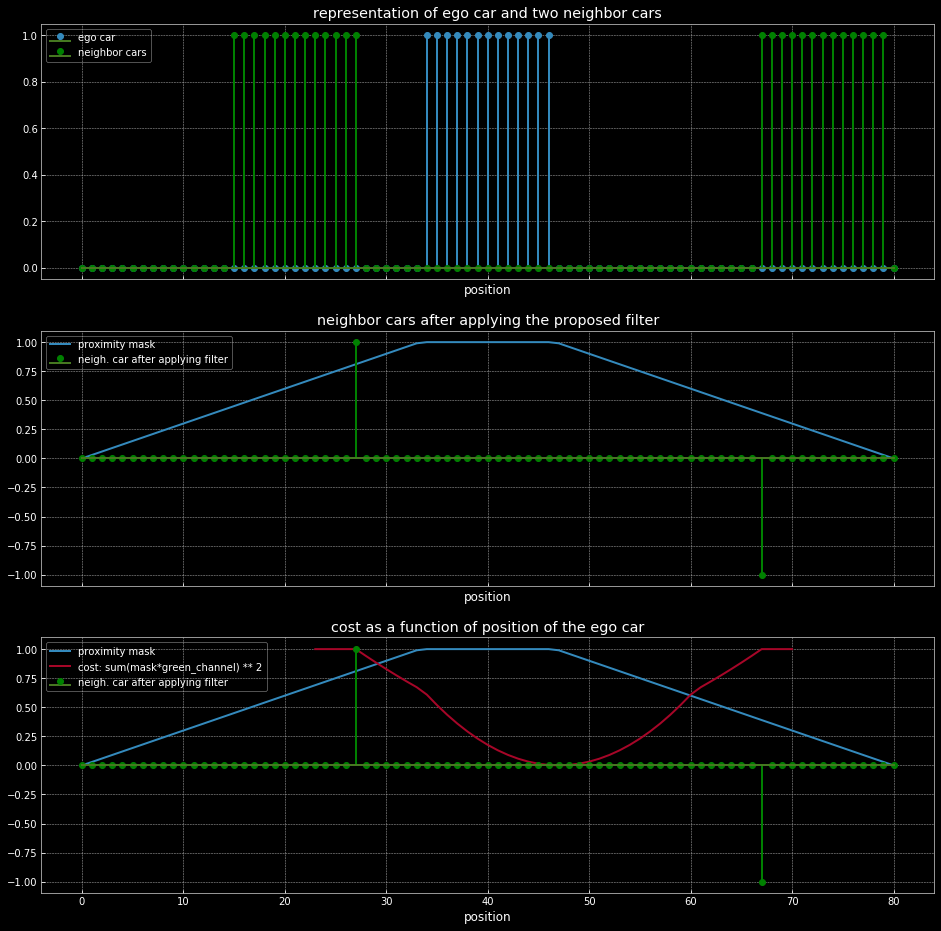

In [3]:
fig, axs = subplots(nrows=3, ncols=1, sharex=True)

x = 1.2 - abs(linspace(-1.2, 1.2, 81)); x[x > 1] = 1
x = zeros(81); x[34:47] = 1
y = zeros(81); y[15:28] = 1.; y[67:80]=1

axs[0].stem(x, label='ego car')
axs[0].stem(y, linefmt='g', markerfmt='og', label='neighbor cars')
axs[0].set_title('representation of ego car and two neighbor cars')
# ylabel('cost')
axs[0].set_xlabel('position')
axs[0].legend(loc="upper left")

## second subplot
x = 1.2 - abs(linspace(-1.2, 1.2, 81)); x[x > 1] = 1
y = zeros(81); y[27] = 1.; y[67]=-1

axs[1].plot(x, label='proximity mask')
axs[1].stem(y, linefmt='g', markerfmt='og', label='neigh. car after applying filter')
axs[1].set_title('neighbor cars after applying the proposed filter')
# ylabel('cost')
axs[1].set_xlabel('position')
axs[1].legend(loc="upper left")

## cost_arr wrt the position of the ego car
x_wide = np.concatenate((np.zeros(30),x,np.zeros(30)))

cost_arr = zeros(51)
for i in range(-20,31):
    x_crop = x_wide[30-i:30-i+81]
    cost = sum(x_crop * y) ** 2
    cost_arr[i+20] = cost

## third subplot
# x = 1.2 - abs(linspace(-1.2, 1.2, 81)); x[x > 1] = 1
# x = zeros(81); x[34:47] = 1
# y = zeros(81); y[23] = 1.; y[67]=-1
# y = 1.2 - abs(linspace(-1.2, 1.2, 15)); y[y > 1] = 1

axs[2].plot(x, label='proximity mask')
axs[2].plot(array(range(23,71)), cost_arr[3:], label='cost: sum(mask*green_channel) ** 2')
axs[2].stem(y, linefmt='g', markerfmt='og', label='neigh. car after applying filter')

axs[2].set_title('cost as a function of position of the ego car')
# ylabel('cost')
axs[2].set_xlabel('position')
axs[2].legend()